<a href="https://colab.research.google.com/github/floydjaggy/RNA_FOLD/blob/main/dca_ccn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import tensorflow as tf
import math
from numpy import asarray
from numpy import save
from numpy import load
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Dropout, Flatten, Input
from sklearn.preprocessing import StandardScaler
import os
import tempfile
from tensorflow import keras
from tensorflow.keras.optimizers import RMSprop
import matplotlib as mpl
import sklearn
#import keras_tuner as kt #may need to pip install keras tuner if doing hyperparameter tuning
import cv2

In [ ]:
#mount your drive to access the data 
#if you are accessing the data from the shared drive then you need to create a shortcut in your drive to the shared drive first
#How do I mount a shared drive in Google Colab? - google this and follow instructions
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df_dca = pd.read_csv('./drive/MyDrive/labeledfrequenciesanddca_may9.csv', index_col=0)

In [ ]:
#this sets the df up to make frames from it

df_dca['positions'] = df_dca.index.str.slice(0,-4)
df_dca.rename(columns = {'file2':'file'}, inplace = True)
file = df_dca.pop('file')
df_dca.insert(loc = 28, column = 'file', value = file)
df_dca

,GA,GG,GC,GU,G-,CC,CU,CG,CA,C-,...,AA,--,-C,-U,-G,-A,bond_type,dca_val,positions,file
index,,,,,,,,,,,,,,,,,,,,,
1:13D2G,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0,0.000000,1:1,3D2G
1:23D2G,0.0376,0.0187,0.0673,0.0752,0.0001,0.0286,0.0441,0.0407,0.0639,0.0000,...,0.0977,0.0150,0.0003,0.0000,0.0003,0.0002,0,0.287503,1:2,3D2G
1:33D2G,0.0635,0.0308,0.0563,0.0483,0.0000,0.0620,0.0436,0.0253,0.0465,0.0000,...,0.0779,0.0138,0.0002,0.0007,0.0001,0.0010,0,0.065946,1:3,3D2G
1:43D2G,0.0600,0.0362,0.0628,0.0393,0.0006,0.0465,0.0268,0.0431,0.0609,0.0000,...,0.1330,0.0129,0.0015,0.0006,0.0002,0.0006,0,-0.062766,1:4,3D2G
1:53D2G,0.0399,0.0422,0.0820,0.0345,0.0002,0.0831,0.0325,0.0153,0.0465,0.0000,...,0.0814,0.0121,0.0018,0.0002,0.0009,0.0009,0,0.037044,1:5,3D2G
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84:804FRG,0.5236,0.0047,0.0142,0.0425,0.0094,0.0094,0.0047,0.0047,0.0094,0.0000,...,0.1840,0.0425,0.0000,0.0094,0.0000,0.0000,0,-0.017244,84:80,4FRG
84:814FRG,0.0330,0.0047,0.0094,0.0189,0.0000,0.0094,0.0094,0.0000,0.1462,0.0000,...,0.0377,0.0425,0.0000,0.0047,0.0000,0.0000,0,0.071048,84:81,4FRG
84:824FRG,0.0330,0.0047,0.0047,0.0094,0.0000,0.0094,0.0047,0.0000,0.0472,0.0000,...,0.5566,0.0425,0.0000,0.0000,0.0000,0.0000,0,-0.093757,84:82,4FRG


In [ ]:
#drop = ['6OL3', '3BWP', '4P95', '5ZAL', '2H0S', '5DI2', '6CB3','2IL9','1FFZ','4L81', '2KRL', '2N1Q', '5DUN' ]
drop = ['6OL3', '3BWP', '4P95', '5ZAL', '2KRL', '2N1Q', '5DUN', '4R4V','5KPY','5OB3','2OIU','4PLX','5M0H','4R0D']

In [ ]:
#badPdbs = ['4RZD','4P95','4R4V','2KRL','1P6V','2N1Q','3BWP','2LC8','3T4B','6FZ0','3ZP8','4PLX','5M0H','4R0D','4GMA','5ZAL']

In [ ]:
#list(set(drop).intersection(badPdbs))

In [ ]:
#list(set(drop)-set(badPdbs))

In [ ]:
test = ['1C2X', '1L9A',  '2MF0',  '2KE6', '4C4Q', '2NBX', '1S9S',  '6UES', '6QN3', '6HAG', '5DDP', '3NDB','4RZD','4PQV','1Z2J']#,'4C4Q'

In [ ]:
df_dca = df_dca.loc[df_dca.file.isin(drop) == False]
len(set(df_dca.file))

66

In [ ]:
df_test_dca = df_dca.loc[df_dca["file"].isin(test)]
df_train_dca = df_dca.loc[df_dca["file"].isin(test) == False]

In [ ]:
def make_array_dca(df_slice):
    ef = df_slice
    bondtype = ef.pop('bond_type')
    ef.insert(loc = 27, column = 'bond_type', value = bondtype) #puts the label at the end of the array, need to adjust if addingMI or DCA to 27
    ef.set_index('positions', inplace = True)
    l = int(math.sqrt(len(ef)))
    arr = np.ones([l, l, 27]) #change to 27 if including mi val or dca val
    for i in range(l):
        for j in range(l): 
            
            arr[i,j,:] = ef.loc[str(i+1)+':'+str(j+1)][0:27] #change to 27 if including MI or DCA val 
    return arr



def make_frames_dca(df):
    frames = []
    labels = []
    for file in set(df['file']):
        print(file)
        arr = make_array_dca(df[df['file'] == file])
        for x in range(len(arr)-11): #0-29
            for y in range(len(arr)-11):
                array_11x11x25 = arr[x:x+11,y:y+11,:-1] #drop the label, first array is arr[0:11], slice is not inclusive of 11
                label = arr[x+5, y+5, -1] #make the label, in this case 0+5 = 5 which is index 6 
                frames.append(array_11x11x25) 
                labels.append(label)
    return frames, labels

In [ ]:
frames_train_dca, labels_train_dca = make_frames_dca(df_train_dca)
X_train_dca =  np.array(frames_train_dca, dtype = np.float32)
y_flt_train_dca = np.array(labels_train_dca)
y_train_dca = y_flt_train_dca.astype(int)
y_train_dca[y_train_dca>0] = 1 #make binary problem
set(y_train_dca)
len(y_train_dca)

4L81
4RUM
3NKB
4K27
4YAZ
3RG5
3ZP8
1KXK
3GX5
3R4F
3DIL
5NWQ
1P6V
1Z43
4LVV
5LYS
3SLQ
3F2Q
5DI2
1GID
5T5A
2LC8
4TZX
3PDR
3T4B
3E5C
4P5J
5K7D
5U3G
4JF2
4XWF
4ENC
3OX0
1XJR
4WFL
6CU1
4QLN
3Q3Z
4JRC
1U9S
4FRG
4GMA
6CB3
6FZ0
1FFZ
2H0S
1NBS
1EHZ
3D2G
2IL9
4Y1O


643175

In [ ]:
frames_test_dca, labels_test_dca = make_frames_dca(df_test_dca)
X_test_dca =  np.array(frames_test_dca, dtype = np.float32)
y_flt_test_dca = np.array(labels_test_dca)
y_test_dca = y_flt_test_dca.astype(int)
y_test_dca[y_test_dca>0] = 1 #make binary problem
set(y_test_dca)
len(y_test_dca)

2KE6
3NDB
1C2X
6QN3
6UES
1Z2J
2NBX
1S9S
2MF0
4C4Q
4RZD
1L9A
6HAG
5DDP
4PQV


141936

In [ ]:
np.bincount(y_test_dca
            )

array([140550,   1386])

In [ ]:
df_puzzles = pd.read_csv('./drive/MyDrive/RF00622.csv', index_col=0)
df_puzzles[['nuc1','nuc2']] =   df_puzzles['positions'].str.split(':', expand=True)
nuc1 = df_puzzles.pop('nuc1')
df_puzzles.insert(loc = 25, column = 'nuc1', value = nuc1)
nuc2 = df_puzzles.pop('nuc2')
df_puzzles.insert(loc = 26, column = 'nuc2', value = nuc2)
df_puzzles.set_index('positions', inplace = True)
df_puzzles.drop(df_puzzles.filter(regex="Unname"),axis=1, inplace=True)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
def make_array_puzzles(df_slice):
    ef = df_slice
    # bondtype = ef.pop('bond_type')
    # ef.insert(loc = 26, column = 'bond_type', value = bondtype) #puts the label at the end of the array, need to adjust if addingMI or DCA to 27
    #ef.set_index('positions', inplace = True)
    l = int(math.sqrt(len(ef)))
    arr = np.ones([l, l, 27]) #change to 27 if including mi val or dca val
    for i in range(l):
        for j in range(l): 
            
            arr[i,j,:] = ef.loc[str(i+1)+':'+str(j+1)][0:27] #change to 27 if including MI or DCA val 
    return arr

def make_frames_puzzles(df):
    frames = []
    position1 = []
    position2 = []
    for file in set(df['file']):
        #print(file)
        arr = make_array_puzzles(df[df['file'] == file])
        for x in range(len(arr)-11): #0-29
            for y in range(len(arr)-11):
                array_11x11x25 = arr[x:x+11,y:y+11,:-2] #drop the label, first array is arr[0:11], slice is not inclusive of 11
                nuc2 = arr[x+5, y+5, -1]
                nuc1 = arr[x+5, y+5, -2] 
                frames.append(array_11x11x25) 
                position1.append(nuc1)
                position2.append(nuc2)
    return frames, position1, position2



In [ ]:
frames_puzzles, nuc1, nuc2 = make_frames_puzzles(df_puzzles)
X_puzzles =  np.array(frames_puzzles, dtype = np.float32)

In [ ]:
df = pd.read_csv('./drive/MyDrive/labeleddinucfreq_may9.csv', index_col=0)

In [ ]:
df['positions'] = df.index.str.slice(0,-4)
df.rename(columns = {'file2':'file'}, inplace = True)
file = df.pop('file')
df.insert(loc = 27, column = 'file', value = file) #change to loc = 28 if using MI or DCA vals
df

,GA,GG,GC,GU,G-,CC,CU,CG,CA,C-,...,AC,AA,--,-C,-U,-G,-A,positions,bond_type,file
index,,,,,,,,,,,,,,,,,,,,,
1:13D2G,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1:1,0,3D2G
1:23D2G,0.0376,0.0187,0.0673,0.0752,0.0001,0.0286,0.0441,0.0407,0.0639,0.0000,...,0.0931,0.0977,0.0150,0.0003,0.0000,0.0003,0.0002,1:2,0,3D2G
1:33D2G,0.0635,0.0308,0.0563,0.0483,0.0000,0.0620,0.0436,0.0253,0.0465,0.0000,...,0.1293,0.0779,0.0138,0.0002,0.0007,0.0001,0.0010,1:3,0,3D2G
1:43D2G,0.0600,0.0362,0.0628,0.0393,0.0006,0.0465,0.0268,0.0431,0.0609,0.0000,...,0.0650,0.1330,0.0129,0.0015,0.0006,0.0002,0.0006,1:4,0,3D2G
1:53D2G,0.0399,0.0422,0.0820,0.0345,0.0002,0.0831,0.0325,0.0153,0.0465,0.0000,...,0.1509,0.0814,0.0121,0.0018,0.0002,0.0009,0.0009,1:5,0,3D2G
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84:804FRG,0.5236,0.0047,0.0142,0.0425,0.0094,0.0094,0.0047,0.0047,0.0094,0.0000,...,0.0189,0.1840,0.0425,0.0000,0.0094,0.0000,0.0000,84:80,0,4FRG
84:814FRG,0.0330,0.0047,0.0094,0.0189,0.0000,0.0094,0.0094,0.0000,0.1462,0.0000,...,0.0236,0.0377,0.0425,0.0000,0.0047,0.0000,0.0000,84:81,0,4FRG
84:824FRG,0.0330,0.0047,0.0047,0.0094,0.0000,0.0094,0.0047,0.0000,0.0472,0.0000,...,0.0236,0.5566,0.0425,0.0000,0.0000,0.0000,0.0000,84:82,0,4FRG


In [ ]:
def make_array(df_slice):
    ef = df_slice
    bondtype = ef.pop('bond_type')
    ef.insert(loc = 26, column = 'bond_type', value = bondtype) #puts the label at the end of the array, need to adjust if addingMI or DCA to 27
    ef.set_index('positions', inplace = True)
    l = int(math.sqrt(len(ef)))
    arr = np.ones([l, l, 26]) #change to 27 if including mi val or dca val
    for i in range(l):
        for j in range(l): 
            
            arr[i,j,:] = ef.loc[str(i+1)+':'+str(j+1)][0:26] #change to 27 if including MI or DCA val 
    return arr



def make_frames(df):
    frames = []
    labels = []
    for file in set(df['file']):
        #print(file)
        arr = make_array(df[df['file'] == file])
        for x in range(len(arr)-11): #0-29
            for y in range(len(arr)-11):
                array_11x11x25 = arr[x:x+11,y:y+11,:-1] #drop the label, first array is arr[0:11], slice is not inclusive of 11
                label = arr[x+5, y+5, -1] #make the label, in this case 0+5 = 5 which is index 6 
                frames.append(array_11x11x25) 
                labels.append(label)
    return frames, labels

In [ ]:
df = df.loc[df.file.isin(drop) == False]
len(set(df.file))

66

In [ ]:
df_test = df.loc[df["file"].isin(test)]
df_train = df.loc[df["file"].isin(test) == False]

In [ ]:
frames_train, labels_train = make_frames(df_train)
X_train =  np.array(frames_train, dtype = np.float32)
y_flt_train = np.array(labels_train)
y_train = y_flt_train.astype(int)
y_train[y_train>0] = 1 #make binary problem
set(y_train)
len(y_train)
np.bincount(y_test_dca)

array([140550,   1386])

In [ ]:
frames_test, labels_test = make_frames(df_test)
X_test =  np.array(frames_test, dtype = np.float32)
y_flt_test = np.array(labels_test)
y_test = y_flt_test.astype(int)
y_test[y_test>0] = 1 #make binary problem
set(y_test)
len(y_test)
np.bincount(y_test)

array([140550,   1386])

In [ ]:
neg, pos = np.bincount(y_train)+np.bincount(y_test) 
total = neg + pos
print('Examples:\n    Total: {}\n    Positive: {} ({:.2f}% of total)\n'.format(
    total, pos, 100 * pos / total))

Examples:
    Total: 785111
    Positive: 6654 (0.85% of total)



In [ ]:
 #SCF: This dies with a file not found error for me.
 #once drive is mounted then you must specify your path to the data 
#you may need to pay for a high-RAM runtime by signing up for google colab pro+ if you run this in colab. there is a lot of data being read in
# dict_train = load('./drive/MyDrive/dca_frame_may_7/dca_frames_train.npz')
# X_train = dict_train['arr_0']
# y_flt_train = load('./drive/MyDrive/dca_frame_may_7/dca_labels_train.npy')
# y_train = y_flt_train.astype(int)
# y_train[y_train>0] = 1 #make binary problem
# set(y_train)
# len(y_train)

# dict_test = load('./drive/MyDrive/dca_frame_may_7/dca_frames_test.npz')
# X_test = dict_test['arr_0']
# y_flt_test = load('./drive/MyDrive/dca_frame_may_7/dca_labels_test.npy')
# y_test = y_flt_test.astype(int)
# y_test[y_test>0] = 1 #make binary problem

# len(y_test)

# neg, pos = np.bincount(y_train)+np.bincount(y_test) 
# total = neg + pos
# print('Examples:\n    Total: {}\n    Positive: {} ({:.2f}% of total)\n'.format(
#     total, pos, 100 * pos / total))

In [ ]:
print('Training labels shape:', y_train.shape)
print('Test labels shape:', y_test.shape)

print('Training features shape:', X_train.shape)
print('Test features shape:', X_test.shape)

Training labels shape: (643175,)
Test labels shape: (141936,)
Training features shape: (643175, 11, 11, 25)
Test features shape: (141936, 11, 11, 25)


In [ ]:
METRICS = [
      keras.metrics.TruePositives(name='tp'),
      keras.metrics.FalsePositives(name='fp'),
      keras.metrics.TrueNegatives(name='tn'),
      keras.metrics.FalseNegatives(name='fn'), 
      keras.metrics.BinaryAccuracy(name='accuracy'),
      keras.metrics.Precision(name='precision'),
      keras.metrics.Recall(name='recall'),
      keras.metrics.AUC(name='auc'),
      keras.metrics.AUC(name='prc', curve='PR'), # precision-recall curve
]
#add resnet layers 
#increase input size by two and use dilation
def make_model(metrics=METRICS,output_bias=None):
  if output_bias is not None:
    output_bias = tf.keras.initializers.Constant(output_bias)
  
  model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 11x11 with 25 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(8, (3,3), activation='relu', input_shape=(11, 11, 25)), #change to 11x11x26 if adding dca values to dinuc frequencies
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.25),
    # The second convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.25),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(224, activation='relu', bias_initializer=output_bias),
    tf.keras.layers.Dropout(0.5),
    # Only 1 output neuron. It will contain a value from 0-1 where 0 for class ('not contact') and 1 for the other ('contact')
    tf.keras.layers.Dense(1, activation='sigmoid')
  ])

  model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=1e-3), #optimizer=RMSprop(lr=0.001),
    loss=keras.losses.BinaryCrossentropy(),
    metrics=metrics)

  return model

In [ ]:
METRICS = [
      keras.metrics.TruePositives(name='tp'),
      keras.metrics.FalsePositives(name='fp'),
      keras.metrics.TrueNegatives(name='tn'),
      keras.metrics.FalseNegatives(name='fn'), 
      keras.metrics.BinaryAccuracy(name='accuracy'),
      keras.metrics.Precision(name='precision'),
      keras.metrics.Recall(name='recall'),
      keras.metrics.AUC(name='auc'),
      keras.metrics.AUC(name='prc', curve='PR'), # precision-recall curve
]
#add resnet layers 
#increase input size by two and use dilation
def make_model_dca(metrics=METRICS,output_bias=None):
  if output_bias is not None:
    output_bias = tf.keras.initializers.Constant(output_bias)
  
  model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 11x11 with 25 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(8, (3,3), activation='relu', input_shape=(11, 11, 26)), #change to 11x11x26 if adding dca values to dinuc frequencies
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.25),
    # The second convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.25),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(224, activation='relu', bias_initializer=output_bias),
    tf.keras.layers.Dropout(0.5),
    # Only 1 output neuron. It will contain a value from 0-1 where 0 for class ('not contact') and 1 for the other ('contact')
    tf.keras.layers.Dense(1, activation='sigmoid')
  ])

  model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=1e-3), #optimizer=RMSprop(lr=0.001),
    loss=keras.losses.BinaryCrossentropy(),
    metrics=metrics)

  return model

In [ ]:
# METRICS = [
#       keras.metrics.TruePositives(name='tp'),
#       keras.metrics.FalsePositives(name='fp'),
#       keras.metrics.TrueNegatives(name='tn'),
#       keras.metrics.FalseNegatives(name='fn'), 
#       keras.metrics.BinaryAccuracy(name='accuracy'),
#       keras.metrics.Precision(name='precision'),
#       keras.metrics.Recall(name='recall'),
#       keras.metrics.AUC(name='auc'),
#       keras.metrics.AUC(name='prc', curve='PR'), # precision-recall curve
# ]

# def make_model(hp, metrics=METRICS):
  
#   model = tf.keras.models.Sequential([
#     # Note the input shape is the desired size of the image 11x11 with 25 bytes color
#     # This is the first convolution
#     tf.keras.layers.Conv2D(hp.Int("conv_1", min_value=8, max_value=24, step=8),
# 		(3, 3), input_shape=(11, 11, 26)), #change to 11x11x26 if adding dca values to dinuc frequencies
#     tf.keras.layers.MaxPooling2D(2, 2),
#     tf.keras.layers.Dropout(0.25),
#     # The second convolution
#     tf.keras.layers.Conv2D(hp.Int("conv_2", min_value=16, max_value=48, step=16),
# 		(3, 3),  input_shape=(11, 11, 26)),
#     tf.keras.layers.MaxPooling2D(2,2),
#     tf.keras.layers.Dropout(0.25),
#     # Flatten the results to feed into a DNN
#     tf.keras.layers.Flatten(),
#     # 512 neuron hidden layer
#     tf.keras.layers.Dense(hp.Int("dense_units", min_value=112,
# 		max_value=336, step=112), activation='relu', bias_initializer=None),
#     tf.keras.layers.Dropout(0.5),
#     # Only 1 output neuron. It will contain a value from 0-1 where 0 for class ('not contact') and 1 for the other ('contact')
#     tf.keras.layers.Dense(1, activation='sigmoid')
#  ])

#   model.compile(
#     optimizer=keras.optimizers.Adam(hp.Choice("learning_rate",
# 		values=[1e-3])), #optimizer=RMSprop(lr=0.001),
#     loss=keras.losses.BinaryCrossentropy(),
#     metrics=metrics)

#   return model
# tuner = kt.Hyperband(
# 		make_model,
# 		objective=kt.Objective("val_prc", direction="max"),
# 		max_epochs=EPOCHS,
# 		factor=3,
# 		seed=42,
#     directory = 'tune_dir3',
#     project_name = 'tuner3'
# 		)
# tuner.search(X_train, y_train, epochs=50, validation_split=0.2, callbacks=[early_stopping])
# # Get the optimal hyperparameters
# #print(tuner.get_best_hyperparameters(num_trials=1)[0])



In [ ]:
model = make_model()
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 9, 9, 8)           1808      
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 4, 4, 8)          0         
 2D)                                                             
                                                                 
 dropout_9 (Dropout)         (None, 4, 4, 8)           0         
                                                                 
 conv2d_7 (Conv2D)           (None, 2, 2, 32)          2336      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 1, 1, 32)         0         
 2D)                                                             
                                                                 
 dropout_10 (Dropout)        (None, 1, 1, 32)         

In [ ]:
mpl.rcParams['figure.figsize'] = (15, 10)
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

In [ ]:
def plot_loss(history, label, n):
  # Use a log scale on y-axis to show the wide range of values.
  plt.semilogy(history.epoch, history.history['loss'],
               color=colors[n], label='Train ' + label)
  plt.semilogy(history.epoch, history.history['val_loss'],
               color=colors[n], label='Val ' + label,
               linestyle="--")
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  

In [ ]:
def plot_cm(labels, predictions, p=0.5):
  cm = confusion_matrix(labels, predictions > p)
  plt.figure(figsize=(5,5))
  sns.heatmap(cm, annot=True, fmt="d")
  plt.title('Confusion matrix @{:.2f}'.format(p))
  plt.ylabel('Actual label')
  plt.xlabel('Predicted label')

  print('Not Contacts Detected (True Negatives): ', cm[0][0])
  print('Not Contacts Incorrectly Detected (False Positives): ', cm[0][1])
  print('Contacts Missed (False Negatives): ', cm[1][0])
  print('Contacts Detected (True Positives): ', cm[1][1])
  print('Total Contacts: ', np.sum(cm[1]))

In [ ]:
def plot_metrics(history):
  metrics = ['loss', 'prc', 'precision', 'recall']
  for n, metric in enumerate(metrics):
    name = metric.replace("_"," ").capitalize()
    plt.subplot(2,2,n+1)
    plt.plot(history.epoch, history.history[metric], color=colors[0], label='Train')
    plt.plot(history.epoch, history.history['val_'+metric],
             color=colors[0], linestyle="--", label='Val')
    plt.xlabel('Epoch')
    plt.ylabel(name)
    if metric == 'loss':
      plt.ylim([0, plt.ylim()[1]])
    elif metric == 'auc':
      plt.ylim([0.8,1])
    else:
      plt.ylim([0,1])

    plt.legend();

In [ ]:
#train with class weights
# Scaling by total/2 helps keep the loss to a similar magnitude.
# The sum of the weights of all examples stays the same.
weight_for_0 = (1 / neg) * (total / 2.0)
weight_for_1 = (1 / pos) * (total / 2.0)

class_weight = {0: weight_for_0, 1: weight_for_1}

print('Weight for class 0: {:.2f}'.format(weight_for_0))
print('Weight for class 1: {:.2f}'.format(weight_for_1))

Weight for class 0: 0.50
Weight for class 1: 59.00


In [ ]:
EPOCHS = 15
BATCH_SIZE = 2048 #large batch size to ensure each batch contains a few contacts 

early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_prc', 
    verbose=1,
    patience=10,
    mode='max',
    restore_best_weights=True)

In [ ]:
weighted_model = make_model()
#weighted_model.load_weights(initial_weights)

weighted_history = weighted_model.fit(
    X_train,
    y_train,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    #callbacks=[early_stopping],
    #validation_data=(X_val, y_val),
    # The class weights go here
    class_weight={0: 0.50, 1: 59.21})

Epoch 1/15
315/315 [==============================] - 22s 64ms/step - loss: 0.5981 - tp: 4535.0000 - fp: 243211.0000 - tn: 535246.0000 - fn: 2119.0000 - accuracy: 0.6875 - precision: 0.0183 - recall: 0.6815 - auc: 0.7633 - prc: 0.0931
Epoch 2/15
315/315 [==============================] - 20s 64ms/step - loss: 0.4702 - tp: 3988.0000 - fp: 132554.0000 - tn: 505353.0000 - fn: 1280.0000 - accuracy: 0.7919 - precision: 0.0292 - recall: 0.7570 - auc: 0.8524 - prc: 0.0840
Epoch 3/15
315/315 [==============================] - 20s 64ms/step - loss: 0.4212 - tp: 4221.0000 - fp: 121647.0000 - tn: 516260.0000 - fn: 1047.0000 - accuracy: 0.8092 - precision: 0.0335 - recall: 0.8013 - auc: 0.8837 - prc: 0.1339
Epoch 4/15
315/315 [==============================] - 20s 64ms/step - loss: 0.3976 - tp: 4361.0000 - fp: 117739.0000 - tn: 520168.0000 - fn: 907.0000 - accuracy: 0.8155 - precision: 0.0357 - recall: 0.8278 - auc: 0.8969 - prc: 0.1625
Epoch 5/15
315/315 [==============================] - 20s 64m

In [ ]:
#plot_metrics(weighted_history)
#this gives an error because i am not currently using a validation set so it cant track the validation loss

In [ ]:
weighted_model_dca = make_model_dca()
#weighted_model.load_weights(initial_weights)

weighted_history_dca = weighted_model_dca.fit(
    X_train_dca,
    y_train_dca,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    #callbacks=[early_stopping],
    #validation_data=(X_val, y_val),
    # The class weights go here
    class_weight={0: 0.50, 1: 59.21})

Epoch 1/15
315/315 [==============================] - 23s 66ms/step - loss: 0.4434 - tp: 5469.0000 - fp: 166830.0000 - tn: 611627.0000 - fn: 1185.0000 - accuracy: 0.7860 - precision: 0.0317 - recall: 0.8219 - auc: 0.8824 - prc: 0.1237
Epoch 2/15
315/315 [==============================] - 21s 66ms/step - loss: 0.3521 - tp: 4522.0000 - fp: 95921.0000 - tn: 541986.0000 - fn: 746.0000 - accuracy: 0.8497 - precision: 0.0450 - recall: 0.8584 - auc: 0.9205 - prc: 0.1806
Epoch 3/15
315/315 [==============================] - 21s 66ms/step - loss: 0.3295 - tp: 4570.0000 - fp: 94345.0000 - tn: 543562.0000 - fn: 698.0000 - accuracy: 0.8522 - precision: 0.0462 - recall: 0.8675 - auc: 0.9304 - prc: 0.2272
Epoch 4/15
315/315 [==============================] - 21s 66ms/step - loss: 0.3146 - tp: 4617.0000 - fp: 90425.0000 - tn: 547482.0000 - fn: 651.0000 - accuracy: 0.8584 - precision: 0.0486 - recall: 0.8764 - auc: 0.9368 - prc: 0.2574
Epoch 5/15
315/315 [==============================] - 21s 66ms/ste

In [ ]:
weighted_model.save('./drive/MyDrive/weighted_model')

INFO:tensorflow:Assets written to: ./drive/MyDrive/weighted_model/assets


In [ ]:
weighted_model_dca.save('./drive/MyDrive/weighted_model_dca')

INFO:tensorflow:Assets written to: ./drive/MyDrive/weighted_model_dca/assets


In [ ]:
 weighted_model = tf.keras.models.load_model('./drive/MyDrive/weighted_model')
 weighted_model_dca = tf.keras.models.load_model('./drive/MyDrive/weighted_model_dca')


In [ ]:
train_predictions_weighted = weighted_model.predict(X_train, batch_size=BATCH_SIZE)
test_predictions_weighted = weighted_model.predict(X_test, batch_size=BATCH_SIZE)

In [ ]:
train_predictions_weighted = weighted_model.predict(X_train, batch_size=BATCH_SIZE)
test_predictions_weighted = weighted_model.predict(X_test, batch_size=BATCH_SIZE)
train_predictions_weighted_dca = weighted_model_dca.predict(X_train_dca, batch_size=BATCH_SIZE)
test_predictions_weighted_dca = weighted_model_dca.predict(X_test_dca, batch_size=BATCH_SIZE)

In [ ]:
df_model_train = pd.DataFrame(train_predictions_weighted, columns = ['DNF'] )

In [ ]:
df_model_train['DNF+DCA'] = train_predictions_weighted_dca
df_model_train['Labels'] = y_train

In [ ]:
df_model_test = pd.DataFrame(test_predictions_weighted, columns = ['DNF'] )
df_model_test['DNF+DCA'] = test_predictions_weighted_dca
df_model_test['Labels'] = y_test

In [ ]:
df_model_test.to_csv('./drive/MyDrive/test.csv')
df_model_train.to_csv('./drive/MyDrive/train.csv')

loss :  0.5532085299491882
tp :  1223.0
fp :  47759.0
tn :  92791.0
fn :  163.0
accuracy :  0.6623689532279968
precision :  0.024968355894088745
recall :  0.8823953866958618
auc :  0.8861595988273621
prc :  0.3802436590194702

Not Contacts Detected (True Negatives):  92791
Not Contacts Incorrectly Detected (False Positives):  47759
Contacts Missed (False Negatives):  163
Contacts Detected (True Positives):  1223
Total Contacts:  1386


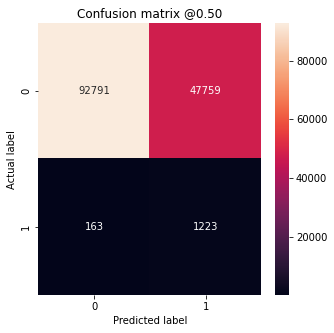

In [ ]:
weighted_results = weighted_model.evaluate(X_test, y_test,
                                           batch_size=BATCH_SIZE, verbose=0)
for name, value in zip(weighted_model.metrics_names, weighted_results):
  print(name, ': ', value)
print()

plot_cm(y_test, test_predictions_weighted)

loss :  0.4346421957015991
tp :  1221.0
fp :  33979.0
tn :  106571.0
fn :  165.0
accuracy :  0.7594408988952637
precision :  0.034687500447034836
recall :  0.8809523582458496
auc :  0.9122452139854431
prc :  0.3920454680919647

Not Contacts Detected (True Negatives):  106571
Not Contacts Incorrectly Detected (False Positives):  33979
Contacts Missed (False Negatives):  165
Contacts Detected (True Positives):  1221
Total Contacts:  1386


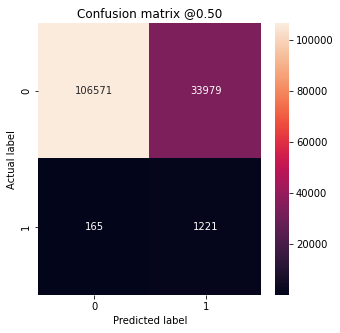

In [ ]:
weighted_results_dca = weighted_model_dca.evaluate(X_test_dca, y_test_dca,
                                           batch_size=BATCH_SIZE, verbose=0)
for name, value in zip(weighted_model_dca.metrics_names, weighted_results_dca):
  print(name, ': ', value)
print()

plot_cm(y_test_dca, test_predictions_weighted_dca)

In [ ]:
from sklearn import metrics

In [ ]:
auc = metrics.roc_auc_score(df_test_dca.bond_type, df_test_dca.dca_val)
auc

0.811984876006264

In [ ]:
def plot_roc(name, labels, predictions, **kwargs):
  fp, tp, _ = sklearn.metrics.roc_curve(labels, predictions)

  plt.plot(100*fp, 100*tp, label=name, linewidth=2, **kwargs)
  plt.xlabel('1-Specifity (Proportion of False Positives)',fontsize = 'large')
  plt.ylabel('Sensitivity (Proportion of True Positives)',fontsize = 'large')
  plt.xlim([-5,100])
  plt.ylim([0,100])
  plt.grid(True,alpha = 0.25)
  ax = plt.gca()
  ax.set_aspect('equal')

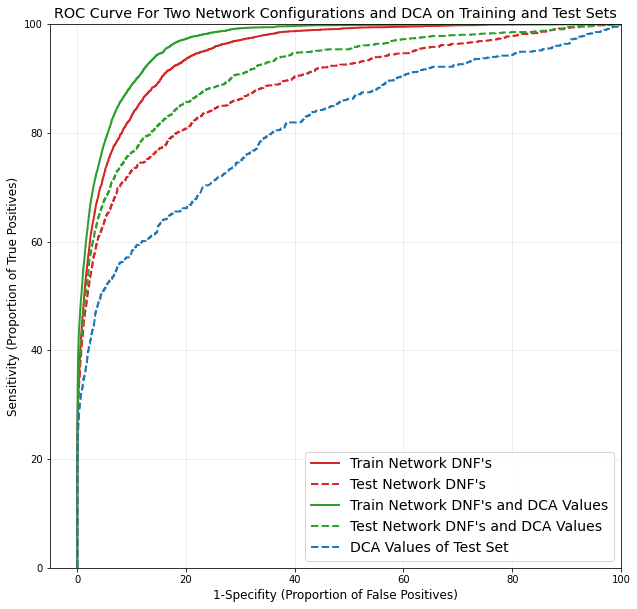

In [ ]:
plot_roc("Train Network DNF's", y_train, train_predictions_weighted, color=colors[3])
plot_roc("Test Network DNF's", y_test, test_predictions_weighted, color=colors[3], linestyle='--')

plot_roc("Train Network DNF's and DCA Values", y_train_dca, train_predictions_weighted_dca, color=colors[2])
plot_roc("Test Network DNF's and DCA Values", y_test_dca, test_predictions_weighted_dca, color=colors[2], linestyle='--')

plot_roc('DCA Values of Test Set', df_test_dca.bond_type, df_test_dca.dca_val, color=colors[0],linestyle='--')
#plot_roc('DCA Train', df_train_dca.bond_type, df_train_dca.dca_val, color=colors[0] )

plt.legend(loc='lower right', fontsize = 14);
plt.title('ROC Curve For Two Network Configurations and DCA on Training and Test Sets', fontsize = 'x-large')
plt.savefig('./drive/MyDrive/roc.jpg',bbox_inches='tight', dpi=150)

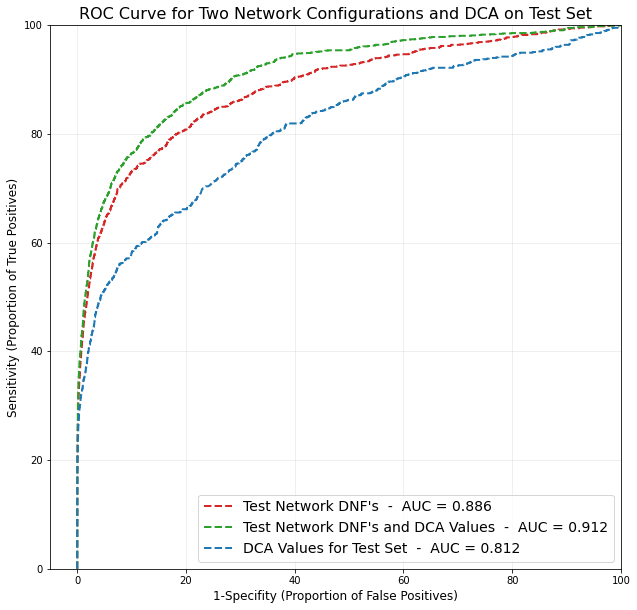

In [ ]:
#plot_roc("Train Weighted", y_train, train_predictions_weighted, color=colors[3])
plot_roc("Test Network DNF's  -  AUC = 0.886", y_test, test_predictions_weighted, color=colors[3], linestyle='--')

#plot_roc("Train Weighted dca", y_train_dca, train_predictions_weighted_dca, color=colors[2])
plot_roc("Test Network DNF's and DCA Values  -  AUC = 0.912", y_test_dca, test_predictions_weighted_dca, color=colors[2], linestyle='--')

plot_roc('DCA Values for Test Set  -  AUC = 0.812', df_test_dca.bond_type, df_test_dca.dca_val, color=colors[0], linestyle='--')
#plot_roc('pyDCA Train', df_train_dca.bond_type, df_train_dca.dca_val, color=colors[0])

plt.legend(loc='lower right', fontsize = 14);
plt.title('ROC Curve for Two Network Configurations and DCA on Test Set' , fontsize = '16')
plt.savefig('./drive/MyDrive/roc_test.jpg',bbox_inches='tight', dpi=150)

In [ ]:
def plot_prc(name, labels, predictions, **kwargs):
    precision, recall, _ = sklearn.metrics.precision_recall_curve(labels, predictions)

    plt.plot( recall, precision, label=name, linewidth=2, **kwargs)
    plt.ylabel('Precision  (TP / (TP + FP))', fontsize = 'large')
    plt.xlabel('Recall  (TP / (TP + FN))',fontsize = 'large')
    plt.grid(True, alpha = 0.25)
    ax = plt.gca()
    ax.set_aspect('equal')
    

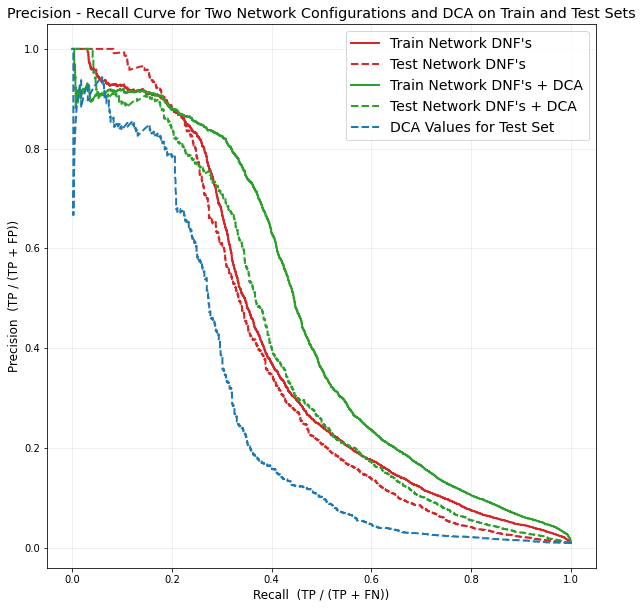

In [ ]:

plot_prc("Train Network DNF's", y_train, train_predictions_weighted, color=colors[3])
plot_prc("Test Network DNF's", y_test, test_predictions_weighted, color=colors[3], linestyle='--')


plot_prc("Train Network DNF's + DCA", y_train_dca, train_predictions_weighted_dca, color=colors[2])
plot_prc("Test Network DNF's + DCA", y_test_dca, test_predictions_weighted_dca, color=colors[2], linestyle='--')


#plot_prc('pyDCA Train', df_train_dca.bond_type, df_train_dca.dca_val, color=colors[0])
plot_prc('DCA Values for Test Set', df_test_dca.bond_type, df_test_dca.dca_val, color=colors[0], linestyle='--')

plt.legend(loc='upper right', fontsize = 14);
plt.title('Precision - Recall Curve for Two Network Configurations and DCA on Train and Test Sets' , fontsize = 'x-large')
plt.savefig('./drive/MyDrive/prc.jpg',bbox_inches='tight', dpi=150)

In [ ]:
from sklearn.metrics import average_precision_score, precision_recall_curve
from sklearn.metrics import auc, plot_precision_recall_curve

In [ ]:
precision, recall, thresholds = precision_recall_curve(y_test, test_predictions_weighted)
precision_wdca, recall_wdca, thresholds_wdca = precision_recall_curve(y_test_dca, test_predictions_weighted_dca)
precision_dca, recall_dca, thresholds_dca = precision_recall_curve(df_test_dca.bond_type, df_test_dca.dca_val,)
auc_precision_recall = auc(recall, precision)
auc_precision_recall_wdca = auc(recall_wdca, precision_wdca)
auc_precision_recall_dca = auc(recall_dca, precision_dca)

In [ ]:
print(auc_precision_recall)
print(auc_precision_recall_wdca)
print(auc_precision_recall_dca)

0.3683065602547156
0.3925140502621748
0.2825718862872568


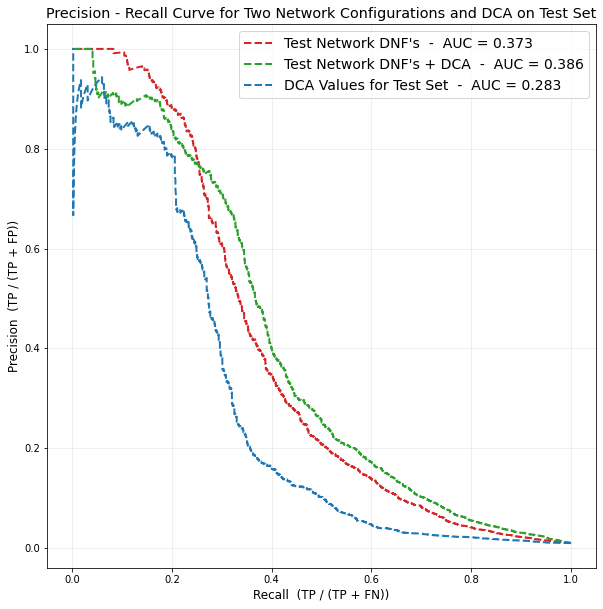

In [ ]:
plot_prc("Test Network DNF's  -  AUC = 0.373", y_test, test_predictions_weighted, color=colors[3], linestyle='--')

plot_prc("Test Network DNF's + DCA  -  AUC = 0.386", y_test_dca, test_predictions_weighted_dca, color=colors[2], linestyle='--')

plot_prc('DCA Values for Test Set  -  AUC = 0.283', df_test_dca.bond_type, df_test_dca.dca_val, color=colors[0], linestyle='--')

plt.legend(loc='upper right', fontsize = 14);
plt.title('Precision - Recall Curve for Two Network Configurations and DCA on Test Set' , fontsize = 'x-large')
plt.savefig('./drive/MyDrive/prc_test.jpg',bbox_inches='tight', dpi=150)

In [ ]:
#test = ['1C2X', '1L9A',  '2MF0',  '2KE6', '4C4Q', '2NBX', '1S9S', '1Z2J', '6UES', '6QN3', '6HAG', '5DDP', '3NDB']
test = ['1C2X', '1L9A',  '2MF0', '2NBX', '1S9S', '1Z2J' ,'6UES', '6QN3', '6HAG', '5DDP', '3NDB','4RZD','4PQV','4C4Q','2KE6']

In [ ]:
len_dict = {'1C2X': 120,
 '1L9A': 128,
 '2MF0': 70,
 '2KE6': 48,
 '4C4Q': 233,
 '2NBX': 108,
 '1S9S': 101,
 '1Z2J': 45,
 '2KRL': 102,
 '6UES': 119,
 '2N1Q': 155,
 '6QN3': 50,
 '6HAG': 43,
 '5DDP': 97,
 '3NDB': 454,
 '4RZD' : 101,
 '4PQV' : 68 }

In [ ]:
def make_array_dca(df_slice):
    ef = df_slice
    bondtype = ef.pop('bond_type')
    ef.insert(loc = 27, column = 'bond_type', value = bondtype) #puts the label at the end of the array, need to adjust if addingMI or DCA to 27
    ef.set_index('positions', inplace = True)
    l = int(math.sqrt(len(ef)))
    arr = np.ones([l, l, 27]) #change to 27 if including mi val or dca val
    for i in range(l):
        for j in range(l): 
            
            arr[i,j,:] = ef.loc[str(i+1)+':'+str(j+1)][0:27] #change to 27 if including MI or DCA val 
    return arr



def make_frames_dca(df):
    frames = []
    labels = []
    for file in set(df['file']):
        print(file)
        arr = make_array_dca(df[df['file'] == file])
        for x in range(len(arr)-11): #0-29
            for y in range(len(arr)-11):
                array_11x11x25 = arr[x:x+11,y:y+11,:-1] #drop the label, first array is arr[0:11], slice is not inclusive of 11
                label = arr[x+5, y+5, -1] #make the label, in this case 0+5 = 5 which is index 6 
                frames.append(array_11x11x25) 
                labels.append([label, str(file),len_dict[str(file)]])
    return frames, labels

In [ ]:

frames_dca, labels_dca = make_frames_dca(df_test_dca)

2KE6
2NBX
6UES
6QN3
1C2X
2MF0
4RZD
6HAG
1Z2J
4C4Q
4PQV
3NDB
1L9A
1S9S
5DDP


In [ ]:
df_22 = pd.DataFrame(labels_dca, columns = ['label', 'file', 'seq_length'])
df_22

In [ ]:
df_22['predict_dca'] = test_predictions_weighted_dca
df_22['predict'] = test_predictions_weighted
df_22

In [ ]:
l_wdca = {}



In [ ]:
l_nodca = {}

In [ ]:
dca = {}

In [ ]:


div = 1
l = []
l2 = []
l_dca = []
for file in test:
  print(file)
  
  lf = df_22[df_22['file']==str(file)]
  #lf = df_test_dca[df_test_dca['file']==str(file)]
  
  length = df_22[df_22['file']==str(file)].seq_length.iloc[0]
  
  
  
  #l.append(sum(lf.nlargest(n = int(length//div), columns = ['predict']).label)/(length//div))
  l2.append(sum(lf.nlargest(n = int(length//div), columns = ['predict_dca']).label)/(length//div))
  #l_dca.append(sum(lf.nlargest(n = int(length//div), columns = ['dca_val']).bond_type)/(length//div))
#l_nodca['L//'+str(div)] = l
l_wdca['L//'+str(div)] = l2
#dca['L//'+str(div)] = l_dca

In [ ]:
l_wdca

In [ ]:
np.average([0.4,
  0.34375,
  0.3,
  0.3425925925925926,
  0.49504950495049505,
  0.4888888888888889,
  0.6386554621848739,
  0.4,
  0.27906976744186046,
  0.3402061855670103,
  0.27973568281938327])




In [ ]:
np.average([0.3465346534653465,
  0.36764705882352944,
  0.21888412017167383,
  0.020833333333333332])

In [ ]:
dca_only = [0.716, 0.670,0.495,0.314]
dca_only_high = [0.855,0.831,0.597,0.373]
dca_only_low = [0.338,0.226,0.216,0.154]

In [ ]:
no_dca = [0.819,0.787,0.517,0.323]
no_dca_high = [0.845,0.811,0.540,0.331]
no_dca_low = [0.749,0.718,0.454,0.301]

In [ ]:
with_dca = [0.830,0.790,0.558,0.351]
with_dca_high = [0.896,0.876,0.638,0.392]
with_dca_low = [0.649,0.555,0.341,0.239]

In [ ]:
# with_dca = [0.778,0.756,0.530,0.349]
# no_dca = [0.786,0.732,0.502,0.318]
# only_dca = [0.729, 0.707,0.516,0.326 ]

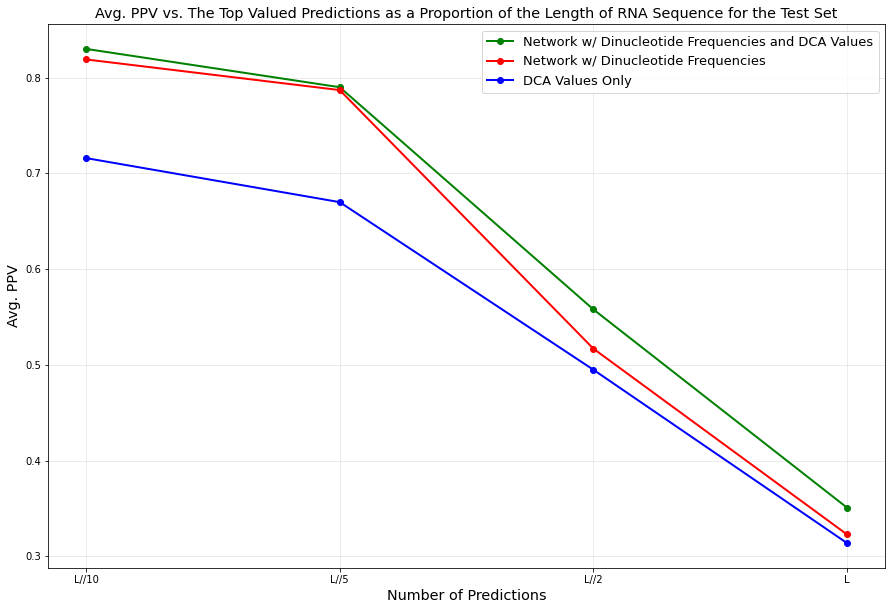

In [ ]:
L =  ['L//10','L//5','L//2','L'] 

plt.plot(L, with_dca,'ko-', color = 'green',linewidth=2, markersize=6)
plt.plot(L, no_dca, 'ko-', color = 'red',linewidth=2, markersize=6)
plt.plot(L, dca_only, 'ko-', color = 'blue',linewidth=2, markersize=6)
plt.legend(['Network w/ Dinucleotide Frequencies and DCA Values','Network w/ Dinucleotide Frequencies', 'DCA Values Only'], fontsize = 13)
plt.xlabel('Number of Predictions', fontsize = 'x-large')
plt.ylabel('Avg. PPV', fontsize = 'x-large')
plt.title('Avg. PPV vs. The Top Valued Predictions as a Proportion of the Length of RNA Sequence for the Test Set', fontsize = 'x-large')

plt.grid(True, alpha = 0.3)
plt.savefig('./drive/MyDrive/PPV.jpg',bbox_inches='tight', dpi=150)
plt.show()

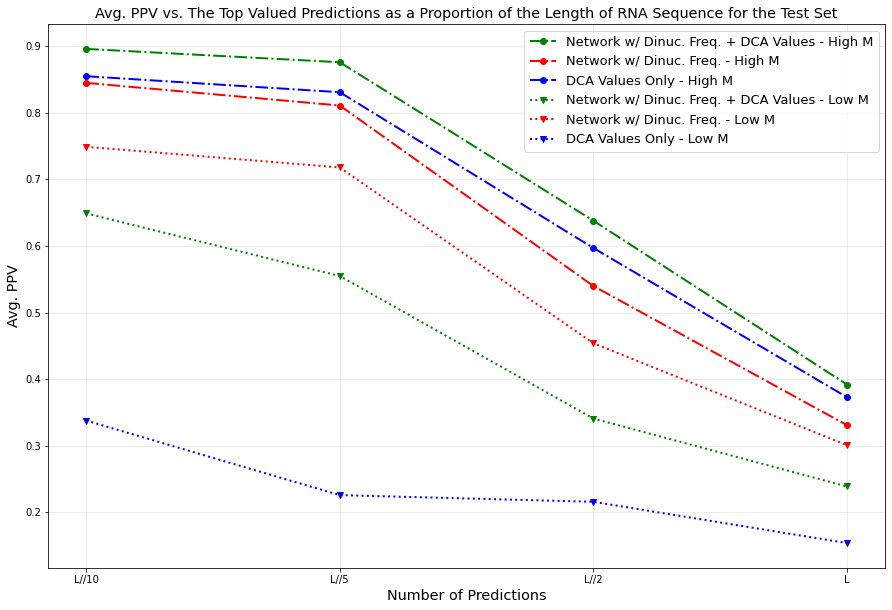

In [ ]:
L =  ['L//10','L//5','L//2','L'] 

plt.plot(L, with_dca_high,'ko-', color = 'green',linewidth=2, markersize=6,linestyle='dashdot')
plt.plot(L, no_dca_high, 'ko-', color = 'red',linewidth=2, markersize=6,linestyle='dashdot')
plt.plot(L, dca_only_high, 'ko-', color = 'blue',linewidth=2, markersize=6,linestyle='dashdot')
plt.plot(L, with_dca_low,'kv-', color = 'green',linewidth=2, markersize=6,linestyle='dotted')
plt.plot(L, no_dca_low, 'kv-', color = 'red',linewidth=2, markersize=6,linestyle='dotted')
plt.plot(L, dca_only_low, 'kv-', color = 'blue',linewidth=2, markersize=6,linestyle='dotted')
plt.legend(['Network w/ Dinuc. Freq. + DCA Values - High M','Network w/ Dinuc. Freq. - High M', 'DCA Values Only - High M','Network w/ Dinuc. Freq. + DCA Values - Low M','Network w/ Dinuc. Freq. - Low M', 'DCA Values Only - Low M', ], fontsize = 13)
plt.xlabel('Number of Predictions',fontsize = 'x-large')
plt.ylabel('Avg. PPV',fontsize = 'x-large')
plt.title('Avg. PPV vs. The Top Valued Predictions as a Proportion of the Length of RNA Sequence for the Test Set', fontsize = 'x-large')
#plt.figure(figsize =(6,12))
#plt.savefig('./ppv')
plt.grid(True, alpha = 0.3)
plt.savefig('./drive/MyDrive/ppv_split.jpg',bbox_inches='tight', dpi=150)
plt.show()

In [ ]:
RNA_puzzles = weighted_model.predict(X_puzzles, batch_size=BATCH_SIZE)

In [ ]:
puzzles = pd.DataFrame(RNA_puzzles, columns = ['predictions'])

In [ ]:
puzzles['nuc1'] = nuc1


In [ ]:
puzzles['nuc2'] = nuc2


In [ ]:
puzzles

,predictions,nuc1,nuc2
0,0.584935,6.0,6.0
1,0.910329,6.0,7.0
2,0.515956,6.0,8.0
3,0.639218,6.0,9.0
4,0.082870,6.0,10.0
...,...,...,...
8095,0.565705,95.0,91.0
8096,0.491918,95.0,92.0
8097,0.776542,95.0,93.0
8098,0.943005,95.0,94.0


In [ ]:
1  - 33
23 - 55

34 - 41
57 - 64

44 - 51
65 - 72

52 - 69
83 - 101

In [ ]:
#use a for loop to renumber?

In [ ]:
df = puzzles[puzzles['nuc1'] > 22] 

df2 = df[df['nuc2'] > 22] 


In [ ]:
df2['nuc1'] = df2['nuc1'] - 22
df2['nuc2'] = df2['nuc2'] - 22
df2

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,predictions,nuc1,nuc2
1547,0.399620,1.0,1.0
1548,0.565842,1.0,2.0
1549,0.422497,1.0,3.0
1550,0.817147,1.0,4.0
1551,0.368936,1.0,5.0
...,...,...,...
8095,0.565705,73.0,69.0
8096,0.491918,73.0,70.0
8097,0.776542,73.0,71.0
8098,0.943005,73.0,72.0


In [ ]:
puzzle = puzzles.nlargest(n=100, columns = ['predictions'])

In [ ]:
puzzle.to_csv('RF00622_predictions.csv')